In [1]:
import pyspark
from pyspark.sql import SparkSession
import os

In [2]:
os.environ['HADOOP_HOME'] = 'C:\\My_tools\\spark-3.1.2-bin-hadoop3.2'
os.environ['SPARK_HOME'] = 'C:\\My_tools\\spark-3.1.2-bin-hadoop3.2'
os.environ['PYSPARK_PYTHON'] = 'C:\\Users\\Pato\\anaconda3\\envs\\vinf_projects\\python.exe'

In [3]:
%run "./lemmatizer.py"
%run "./index.py"

In [4]:
INPUT_WIKI_FILE_PATH = 'data/skwiki-latest-pages-articles_debug2.xml'
LEMMATIZED_FILE_PATH = 'data/lemmatized.csv'

In [13]:
lemmatizer = PysparkWikiLemmatizer()
# lemmatizer.print_first_n_lines_of_file(INPUT_WIKI_FILE_PATH, 10000)

In [6]:
spark_session = SparkSession.builder.master("local[*]") \
                    .appName('skWikiLemmatizer') \
                    .config("spark.jars.packages", "com.databricks:spark-xml_2.12:0.12.0") \
                    .getOrCreate()  

In [7]:
lemmatizer.lemmatize(spark_session, INPUT_WIKI_FILE_PATH, LEMMATIZED_FILE_PATH)

Starting lemmatization process
Parsing process has finished
Cleaning process has finished
Lemmatization process has finished


In [8]:
index_lemma = IndexLemma()
index_lemma.create_index(LEMMATIZED_FILE_PATH)

index_non_lemma = IndexNonLemma()
index_non_lemma.create_index(LEMMATIZED_FILE_PATH)

## Search for non-lemmas

In [9]:
lemma = 'únia poľsko'

index_lemma.lookup_query(lemma)

Lemma: únia, non-lemma: {'úniou', 'únií', 'únii', 'úniu', 'únie'}
Lemma: poľsko, non-lemma: {'poľskými', 'poľska', 'poľské', 'poľských', 'poľského', 'poľskému', 'poľskom', 'poľsku', 'poľskou', 'poľská', 'poľskej', 'poľský', 'poľske', 'poľskí', 'poľským', 'poľskú'}


## Search for lemmas

In [10]:
non_lemma = 'prahe mestom'

index_non_lemma.lookup_query(non_lemma)

Non-lemma: prahe, lemma: praha
Non-lemma: mestom, lemma: mesto


Number of unique words: 354024
Number of unique lemmas: 258678
Number of unique non-lemmas: 95346


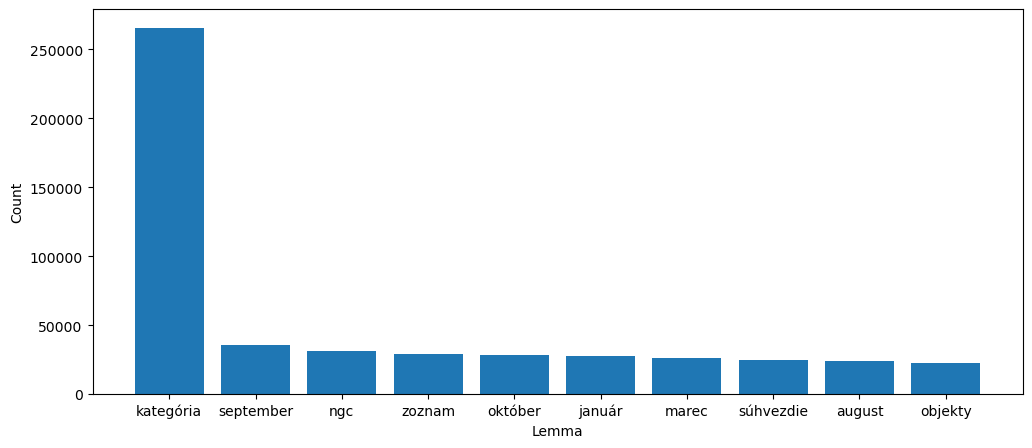

In [11]:
index_lemma.calc_overall_statistics(LEMMATIZED_FILE_PATH)